# Multiple Linear Regression Assignment

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset

bsd = pd.read_csv(r"D:\Msc MLAI\Regression\Assignment\Bike Sharing Dataset.csv")
bsd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Inspecting the various aspects of the dataset**

In [3]:
#Checking the shape of the dataset

print(f'The dataset contains {bsd.shape[0]} rows and {bsd.shape[1]} columns')

The dataset contains 730 rows and 16 columns


In [4]:
bsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see that there is no null values present in the dataset.

### Data Dictionary:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [5]:
#Dropping Features

drop_col = ['instant', 'dteday']

bsd_2 = bsd.drop(labels = drop_col, axis = 1)

bsd_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- We dropped the 'instant' column as it is just an index and would not impact out analysis.
- We dropped the 'dteday' column since we already have columns for 'weekday', 'month' and 'year'.

In [6]:
bsd_2.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observations:

- **season:** Season is a categorical variable and from the data dictionary we know that each number represents a particular season.

- **yr:** Yr is a dummy variable. Comprises of 2 years (0: 2018, 1:2019). 
- **mnth:** Month is the number of months in a year. It is a categorical variable where each number represents a month starting from 1 to 12.
- **holiday:** A dummy variable of True/False nature where if it is a holiday it is 1 else 0.
- **weekday:** A categorical variable ranging from 0 tp 6 where each number represents a certain day to the week starting from 0 on Sunday.
- **workingday:** A dummy variable of True/False nature where if it is neither weekend nor holiday it is 1 else 0.
- **weathersit:** A categorical variable where each number corresponds to a weather type. From the data dictionary we know that there should be 4 weather types but we only have 3.
- **temp:** The temperature revolves around 2.5 to 35.3 degree celsius with an average temperature of 20.3 degree celsius.
- **atemp:** This is the measure of what the temperature actually feels like. It is ranging from 4 to 42 degree celsius with an averahe of 23 degree celsius.
- **hum:** Q1, Q2 and Q3 is showing a 50%+ humidity level which means the humidity is quite high.
- **windspeed:** windspeed doesn't show much variance within Q1 to Q3 with a mean of 13.
- **casual:** Shows the count of casual bikers and shows quite high variance.
- **registered:** Shows the count of registered bikers and shows relatively lower variance as compared to casual bikers.

***We need to transform categorical variables so that we can create dummy variables later***

In [7]:
# Transforming season:

bsd_2['season'] = bsd_2['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

bsd_2['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [8]:
# Transforming month:

bsd_2['mnth'] = bsd_2['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 
                                   10: 'oct', 11: 'nov', 12: 'dec'})

bsd_2['mnth'].value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [9]:
# Transforming weekday:

bsd_2['weekday'] = bsd_2['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})

bsd_2['weekday'].value_counts()

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

In [10]:
# Transforming weathersit:

bsd_2['weathersit'] = bsd_2['weathersit'].map({1: 'Clear to Partly Cloudly', 2: 'Mist and Cloudy', 3: 'Light Rain or Snow',
                                               4: 'Heavy Rain or Snow'})

bsd_2['weathersit'].value_counts()

Clear to Partly Cloudly    463
Mist and Cloudy            246
Light Rain or Snow          21
Name: weathersit, dtype: int64

In [11]:
bsd_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,Clear to Partly Cloudly,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,Clear to Partly Cloudly,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,Clear to Partly Cloudly,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploratory Data Analysis

***Analyzing the Target Vatiable (cnt) which is the count of total bikes rented***

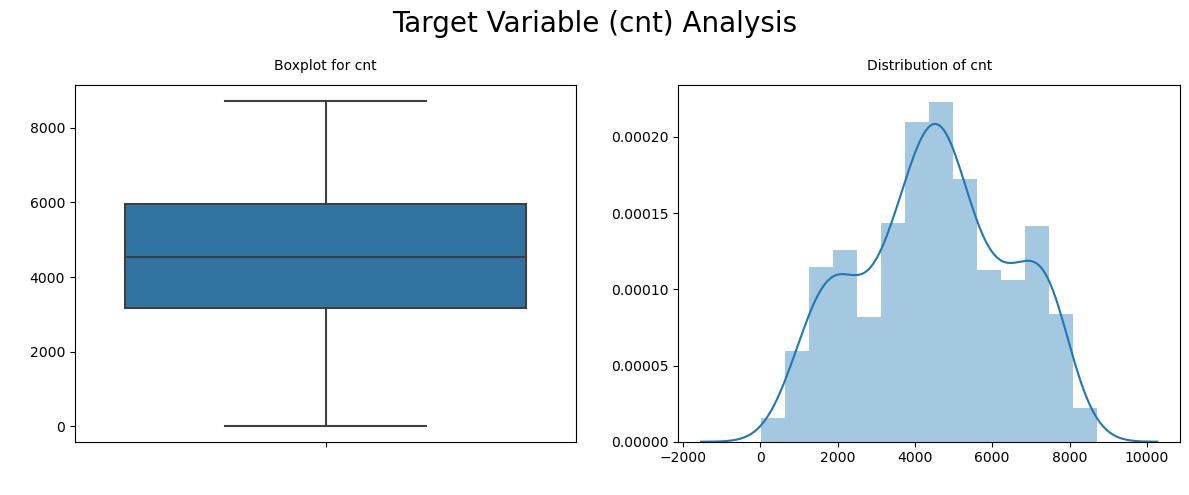

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

In [12]:
#subplot grid:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

#Title
plt.suptitle('Target Variable (cnt) Analysis', fontsize = 20)

#Plot 1:
sns.boxplot(y = bsd_2['cnt'], ax= ax[0])
ax[0].set_title('Boxplot for cnt', fontsize = 10, fontweight = 20, y= 1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#Plot 2:
sns.distplot(bsd_2['cnt'], ax = ax[1])
ax[1].set_title('Distribution of cnt', fontsize = 10, fontweight = 20, y= 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.tight_layout()
plt.show()
bsd_2['cnt'].describe()

- The target variable shows a distribution which is close to normal distribution. Each side of the distribution has two distinct pleatues.
- IQR of the target variable is 2797 with a median of 4548 and mean of 4508.

***Analyzing continuous independent variables***

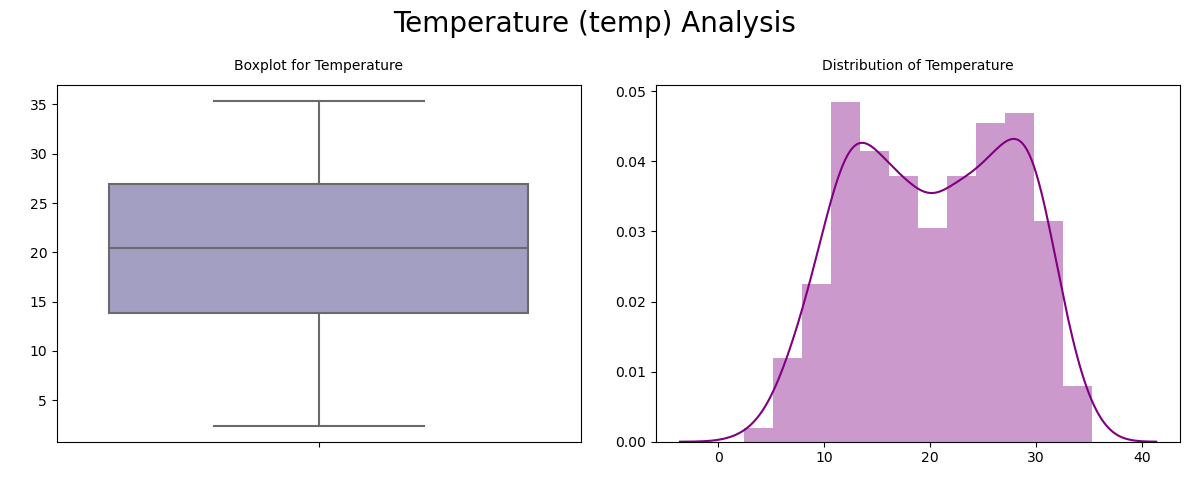

In [13]:
#subplot grid:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

#Title
plt.suptitle('Temperature (temp) Analysis', fontsize = 20)

#Plot 1:
sns.boxplot(y = bsd_2['temp'], ax= ax[0], palette = 'Purples')
ax[0].set_title('Boxplot for Temperature', fontsize = 10, fontweight = 20, y= 1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#Plot 2:
sns.distplot(bsd_2['temp'], ax = ax[1], color = 'purple')
ax[1].set_title('Distribution of Temperature', fontsize = 10, fontweight = 20, y= 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.tight_layout()
plt.show()

- From the box plot we observe that Q1 and Q3 of temp is distributed between 14 and 27 with a median of 21.
- From the distribution of temp is double peaked.
- No outliers present.

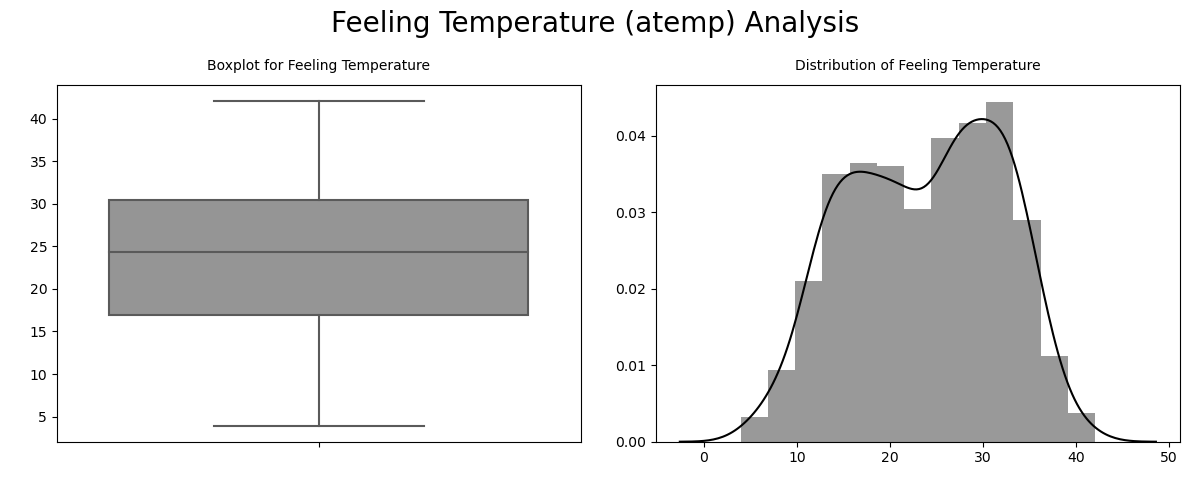

In [14]:
#subplot grid:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

#Title
plt.suptitle('Feeling Temperature (atemp) Analysis', fontsize = 20)

#Plot 1:
sns.boxplot(y = bsd_2['atemp'], ax= ax[0], palette = 'Greys')
ax[0].set_title('Boxplot for Feeling Temperature', fontsize = 10, fontweight = 20, y= 1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#Plot 2:
sns.distplot(bsd_2['atemp'], ax = ax[1], color = 'black')
ax[1].set_title('Distribution of Feeling Temperature', fontsize = 10, fontweight = 20, y= 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.tight_layout()
plt.show()

- From the boxplot we can see that Q1 and Q3 of atemp is distributed between 17 and 31 with a median of 24.
- From the distribution from we can see that atemp also has two peaks similar to temp.
- No outliers present.

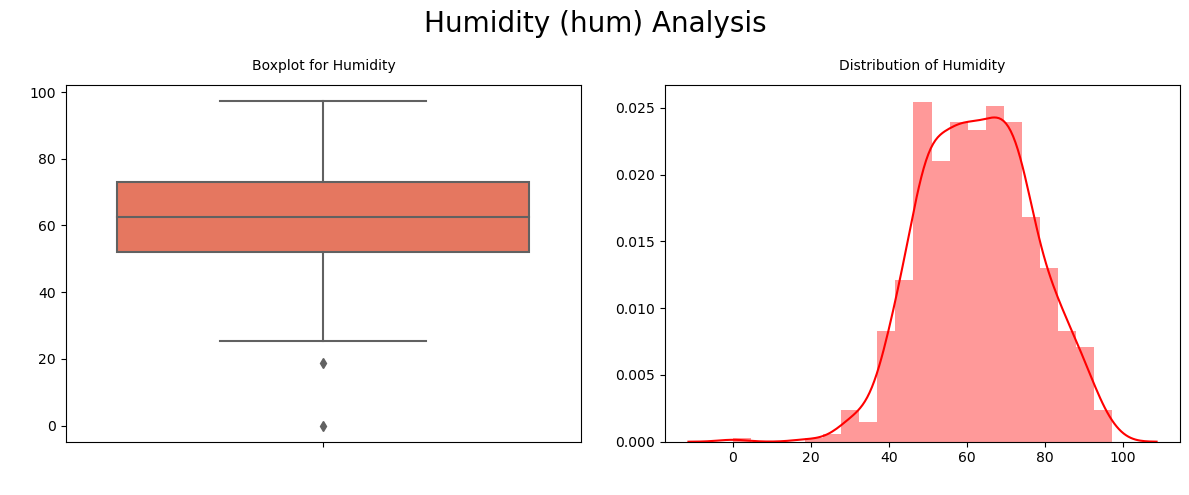

In [15]:
#subplot grid:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

#Title
plt.suptitle('Humidity (hum) Analysis', fontsize = 20)

#Plot 1:
sns.boxplot(y = bsd_2['hum'], ax= ax[0], palette = 'Reds')
ax[0].set_title('Boxplot for Humidity', fontsize = 10, fontweight = 20, y= 1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#Plot 2:
sns.distplot(bsd_2['hum'], ax = ax[1], color = 'red')
ax[1].set_title('Distribution of Humidity', fontsize = 10, fontweight = 20, y= 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.tight_layout()
plt.show()

- From the boxplot we can see that there is presence of outliers present in the dataset.
- Q1 and Q3 both being above 50%+ signifies high amount of humidity.
- The distribution seems to be skewed towards the left.

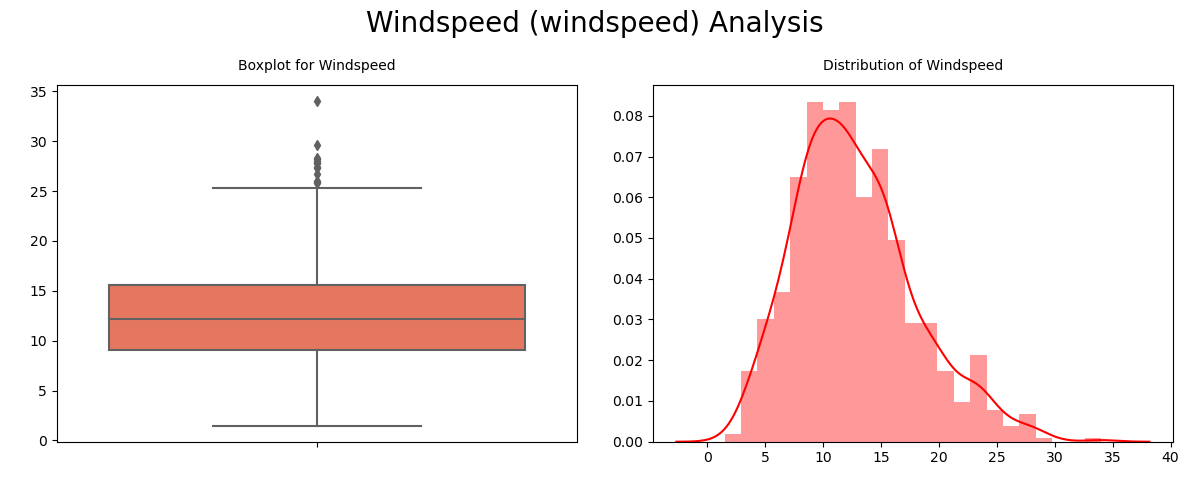

In [16]:
#subplot grid:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

#Title
plt.suptitle('Windspeed (windspeed) Analysis', fontsize = 20)

#Plot 1:
sns.boxplot(y = bsd_2['windspeed'], ax= ax[0], palette = 'Reds')
ax[0].set_title('Boxplot for Windspeed', fontsize = 10, fontweight = 20, y= 1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#Plot 2:
sns.distplot(bsd_2['windspeed'], ax = ax[1], color = 'red')
ax[1].set_title('Distribution of Windspeed', fontsize = 10, fontweight = 20, y= 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.tight_layout()
plt.show()

- From the boxplot we can see that there is presence of outliers.
- Other than the outliers the variance overall seems to be quite stable.
- The distribution seems to be skewed towards the right.

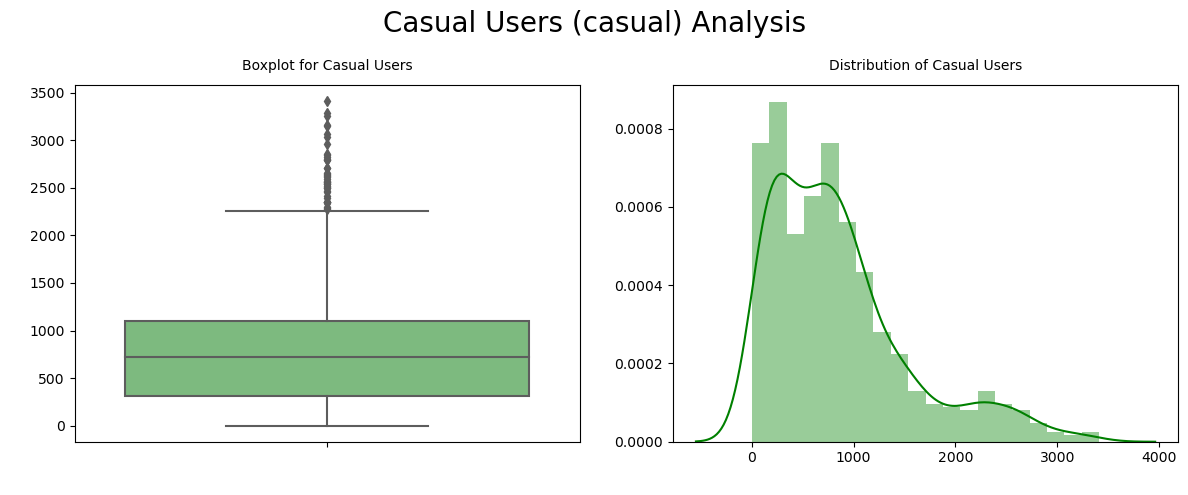

In [17]:
#subplot grid:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

#Title
plt.suptitle('Casual Users (casual) Analysis', fontsize = 20)

#Plot 1:
sns.boxplot(y = bsd_2['casual'], ax= ax[0], palette = 'Greens')
ax[0].set_title('Boxplot for Casual Users', fontsize = 10, fontweight = 20, y= 1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#Plot 2:
sns.distplot(bsd_2['casual'], ax = ax[1], color = 'green')
ax[1].set_title('Distribution of Casual Users', fontsize = 10, fontweight = 20, y= 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.tight_layout()
plt.show()

- From the boxplot we can see that there is presence of outliers.
- From the distribution plot we can see that there is highly skewed towards the right.

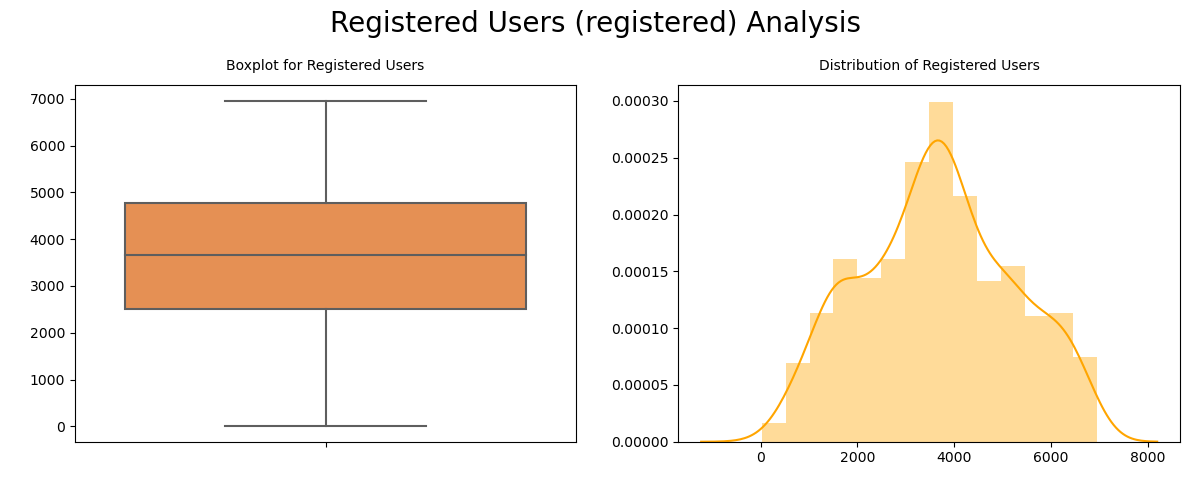

In [18]:
#subplot grid:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

#Title
plt.suptitle('Registered Users (registered) Analysis', fontsize = 20)

#Plot 1:
sns.boxplot(y = bsd_2['registered'], ax= ax[0], palette = 'Oranges')
ax[0].set_title('Boxplot for Registered Users', fontsize = 10, fontweight = 20, y= 1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#Plot 2:
sns.distplot(bsd_2['registered'], ax = ax[1], color = 'orange')
ax[1].set_title('Distribution of Registered Users', fontsize = 10, fontweight = 20, y= 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.tight_layout()
plt.show()

- From the boxplot we can see that there are no outliers present.
- The distribution seems to be similar to that of the target variable.

**Analyzing Categorical Independent Variables**

In [19]:
# Creating a list of categorical variables

cat = [i for i in bsd_2.select_dtypes(include = 'object').columns]
cat.extend([i for i in bsd_2.columns if bsd_2[i].nunique() == 2])
cat

['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']

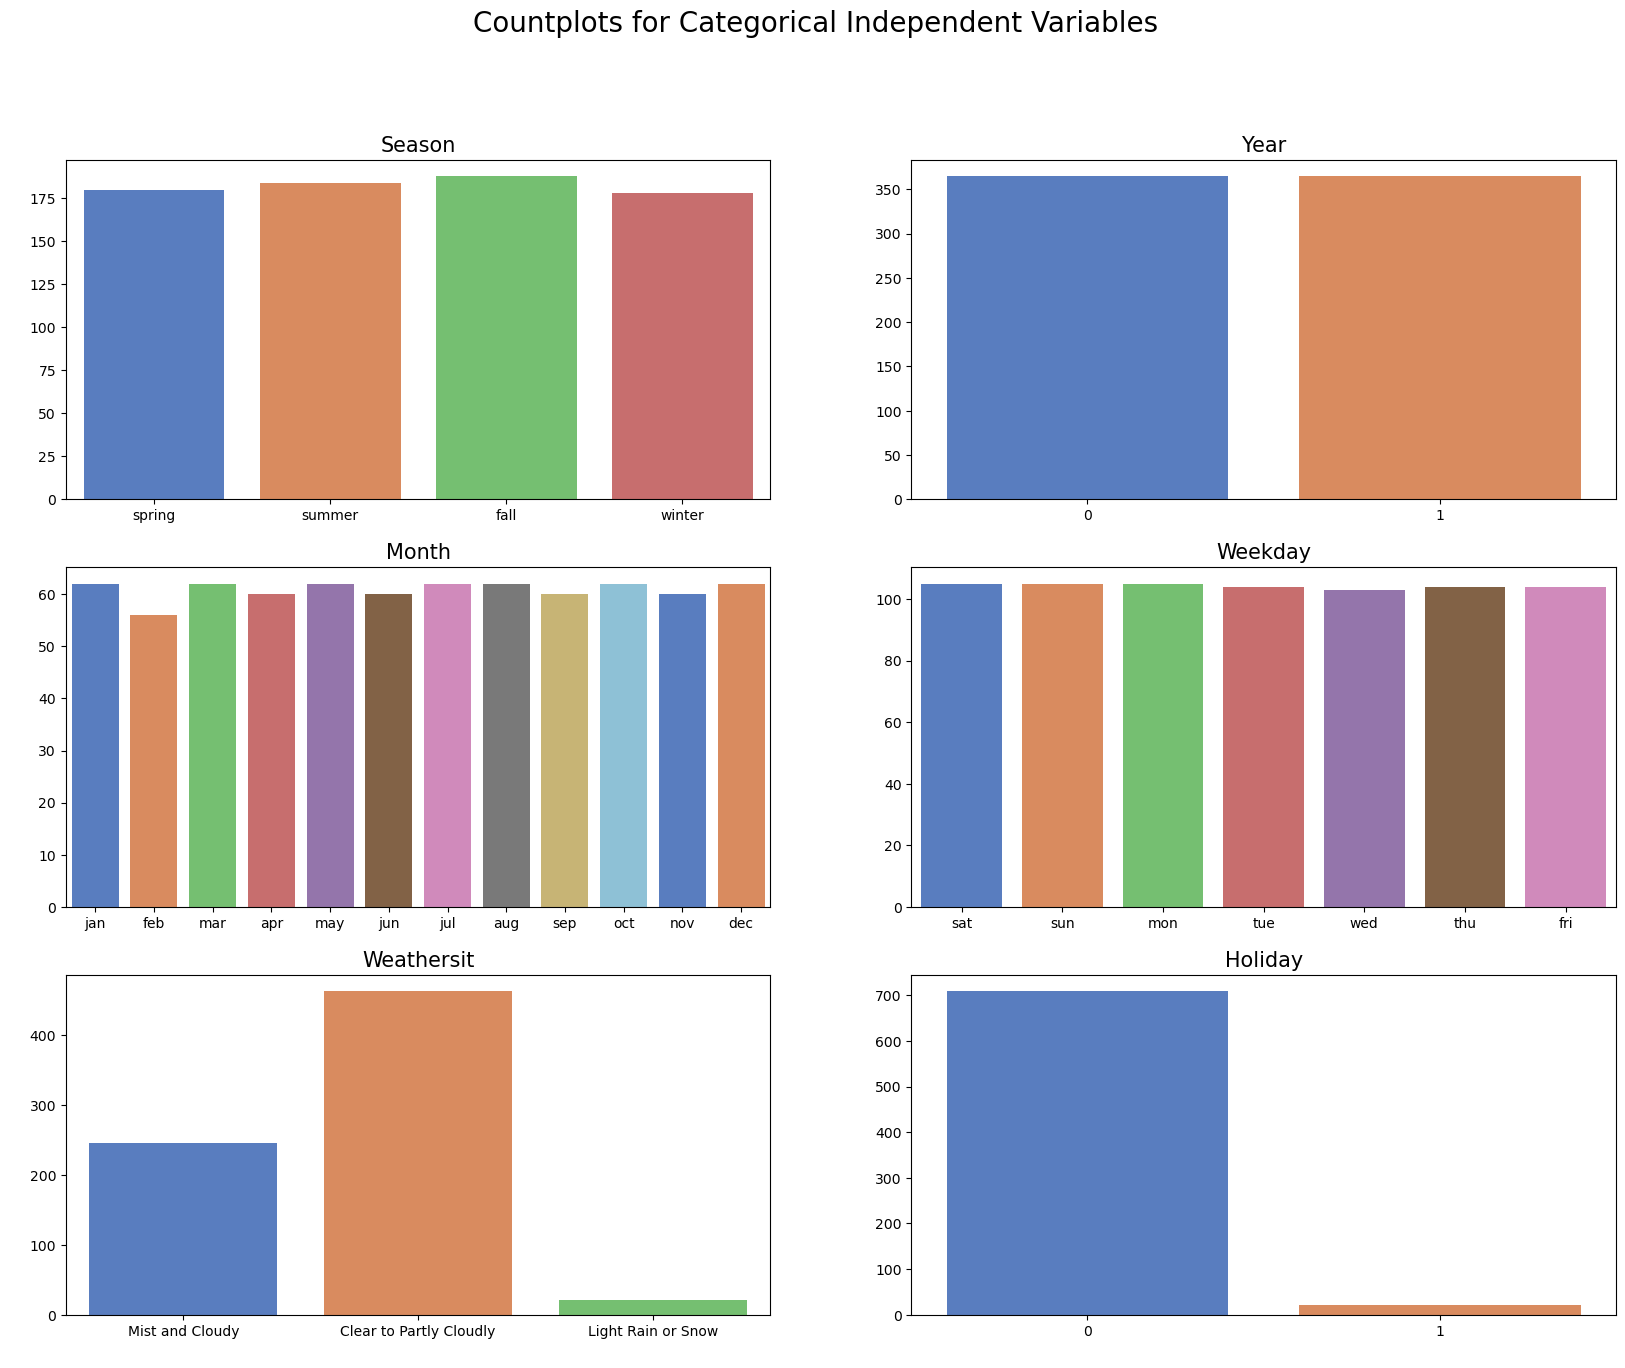

In [20]:
# subplot grid:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 15))

# Title
plt.suptitle('Countplots for Categorical Independent Variables', fontsize = 20, fontweight = 20)

#plot for Seasons
sns.countplot(data = bsd_2 , x = 'season',  ax = ax[0, 0], palette = 'muted')        

ax[0, 0].set_title('Season', fontsize = 15)
ax[0, 0].set_ylabel(' ')
ax[0, 0].set_xlabel(' ')

#plot for Year
sns.countplot(data = bsd_2 , x = 'yr',  ax = ax[0, 1], palette = 'muted')        

ax[0, 1].set_title('Year', fontsize = 15)
ax[0, 1].set_ylabel(' ')
ax[0, 1].set_xlabel(' ')

#plot for Month
sns.countplot(data = bsd_2 , x = 'mnth',  ax = ax[1, 0], palette = 'muted')        

ax[1, 0].set_title('Month', fontsize = 15)
ax[1, 0].set_ylabel(' ')
ax[1, 0].set_xlabel(' ')

#plot for Weekday
sns.countplot(data = bsd_2 , x = 'weekday',  ax = ax[1, 1], palette = 'muted')        

ax[1, 1].set_title('Weekday', fontsize = 15)
ax[1, 1].set_ylabel(' ')
ax[1, 1].set_xlabel(' ')

#plot for Weathersit
sns.countplot(data = bsd_2 , x = 'weathersit',  ax = ax[2, 0], palette = 'muted')        

ax[2, 0].set_title('Weathersit', fontsize = 15)
ax[2, 0].set_ylabel(' ')
ax[2, 0].set_xlabel(' ')

#plot for Holiday
sns.countplot(data = bsd_2 , x = 'holiday',  ax = ax[2, 1], palette = 'muted')        

ax[2, 1].set_title('Holiday', fontsize = 15)
ax[2, 1].set_ylabel(' ')
ax[2, 1].set_xlabel(' ')

plt.show()

- From the plots we can see that Fall is the longest season followed by summer then spring and finally winter.
- Weathersit shows the types of weather situation. We can see from the plot that most of the days have been 'Clear to Partly Cloudy'. The has been hardly any rain or snowfall.

**Analysis of Target Variables with Continuous Variables**

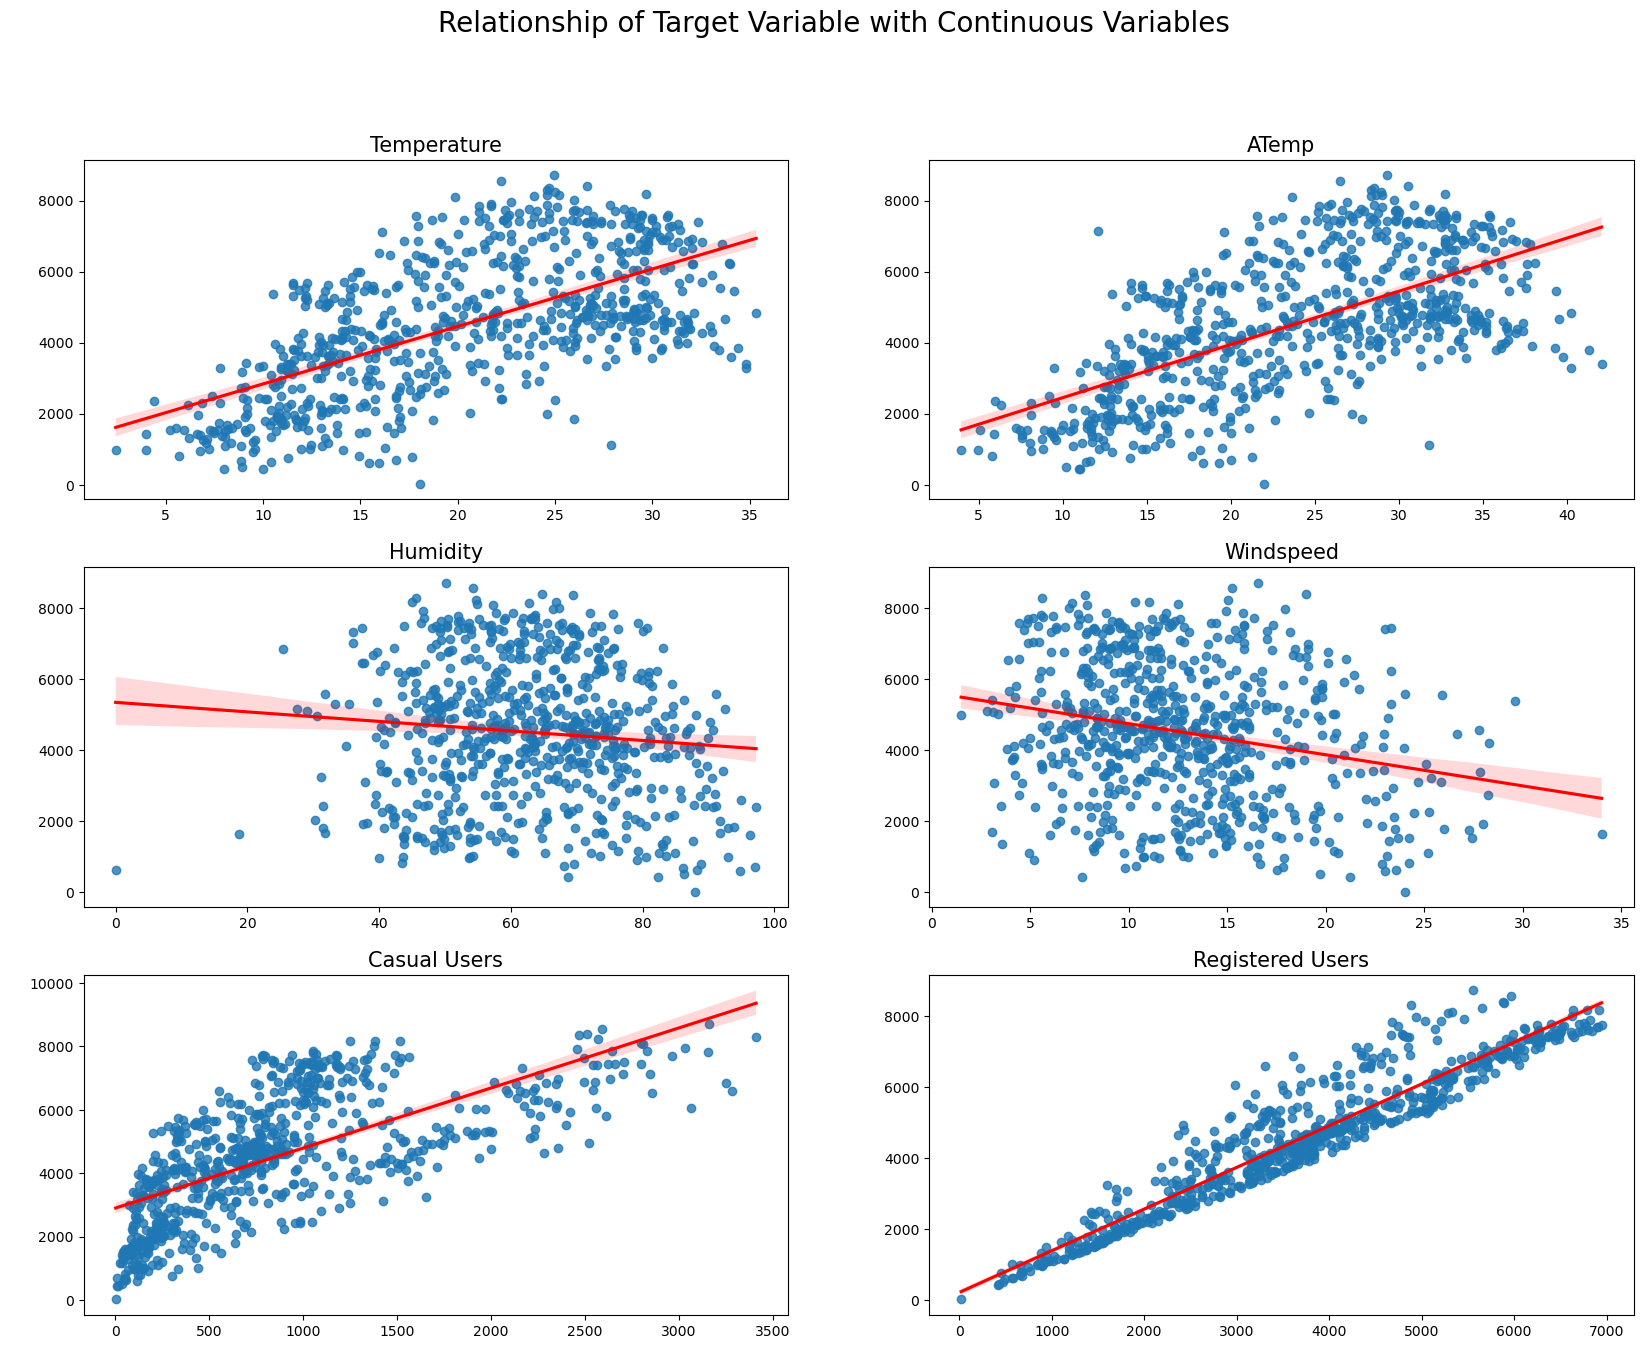

In [21]:
# subplot grid:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 15))

# Title
plt.suptitle('Relationship of Target Variable with Continuous Variables', fontsize = 20, fontweight = 20)

#Scatter plot of Temperature
sns.regplot(x = bsd_2['temp'], y = bsd_2['cnt'], ax = ax[0, 0], line_kws = {'color': 'red'})
ax[0, 0].set_title('Temperature', fontsize = 15)
ax[0, 0].set_ylabel(' ')
ax[0, 0].set_xlabel(' ')

#Scatter plot of Atemp
sns.regplot(x = bsd_2['atemp'], y = bsd_2['cnt'], ax = ax[0, 1], line_kws = {'color': 'red'})
ax[0, 1].set_title('ATemp', fontsize = 15)
ax[0, 1].set_ylabel(' ')
ax[0, 1].set_xlabel(' ')

#Scatter plot of Humidity
sns.regplot(x = bsd_2['hum'], y = bsd_2['cnt'], ax = ax[1, 0], line_kws = {'color': 'red'})
ax[1, 0].set_title('Humidity', fontsize = 15)
ax[1, 0].set_ylabel(' ')
ax[1, 0].set_xlabel(' ')

#Scatter plot of Windspeed
sns.regplot(x = bsd_2['windspeed'], y = bsd_2['cnt'], ax = ax[1, 1], line_kws = {'color': 'red'})
ax[1, 1].set_title('Windspeed', fontsize = 15)
ax[1, 1].set_ylabel(' ')
ax[1, 1].set_xlabel(' ')

#Scatter plot of Casual Users
sns.regplot(x = bsd_2['casual'], y = bsd_2['cnt'], ax = ax[2, 0], line_kws = {'color': 'red'})
ax[2, 0].set_title('Casual Users', fontsize = 15)
ax[2, 0].set_ylabel(' ')
ax[2, 0].set_xlabel(' ')

#Scatter plot of Registered Users
sns.regplot(x = bsd_2['registered'], y = bsd_2['cnt'], ax = ax[2, 1], line_kws = {'color': 'red'})
ax[2, 1].set_title('Registered Users', fontsize = 15)
ax[2, 1].set_ylabel(' ')
ax[2, 1].set_xlabel(' ')

plt.show()

- From the scatter plots we can see that temperature and Atemp have directly proportional relationship with the Target Variable.
- Humidity and Windspeed shows and inversely proportional relationship with the Target Variable.
- Casual and Registered Users shows and directly proportional relationship with the Target Variable.
- We can see that the variation in the Target Variable is explained well by Registered Users. 

**Analysis of Target Variable with Categorical Variables**

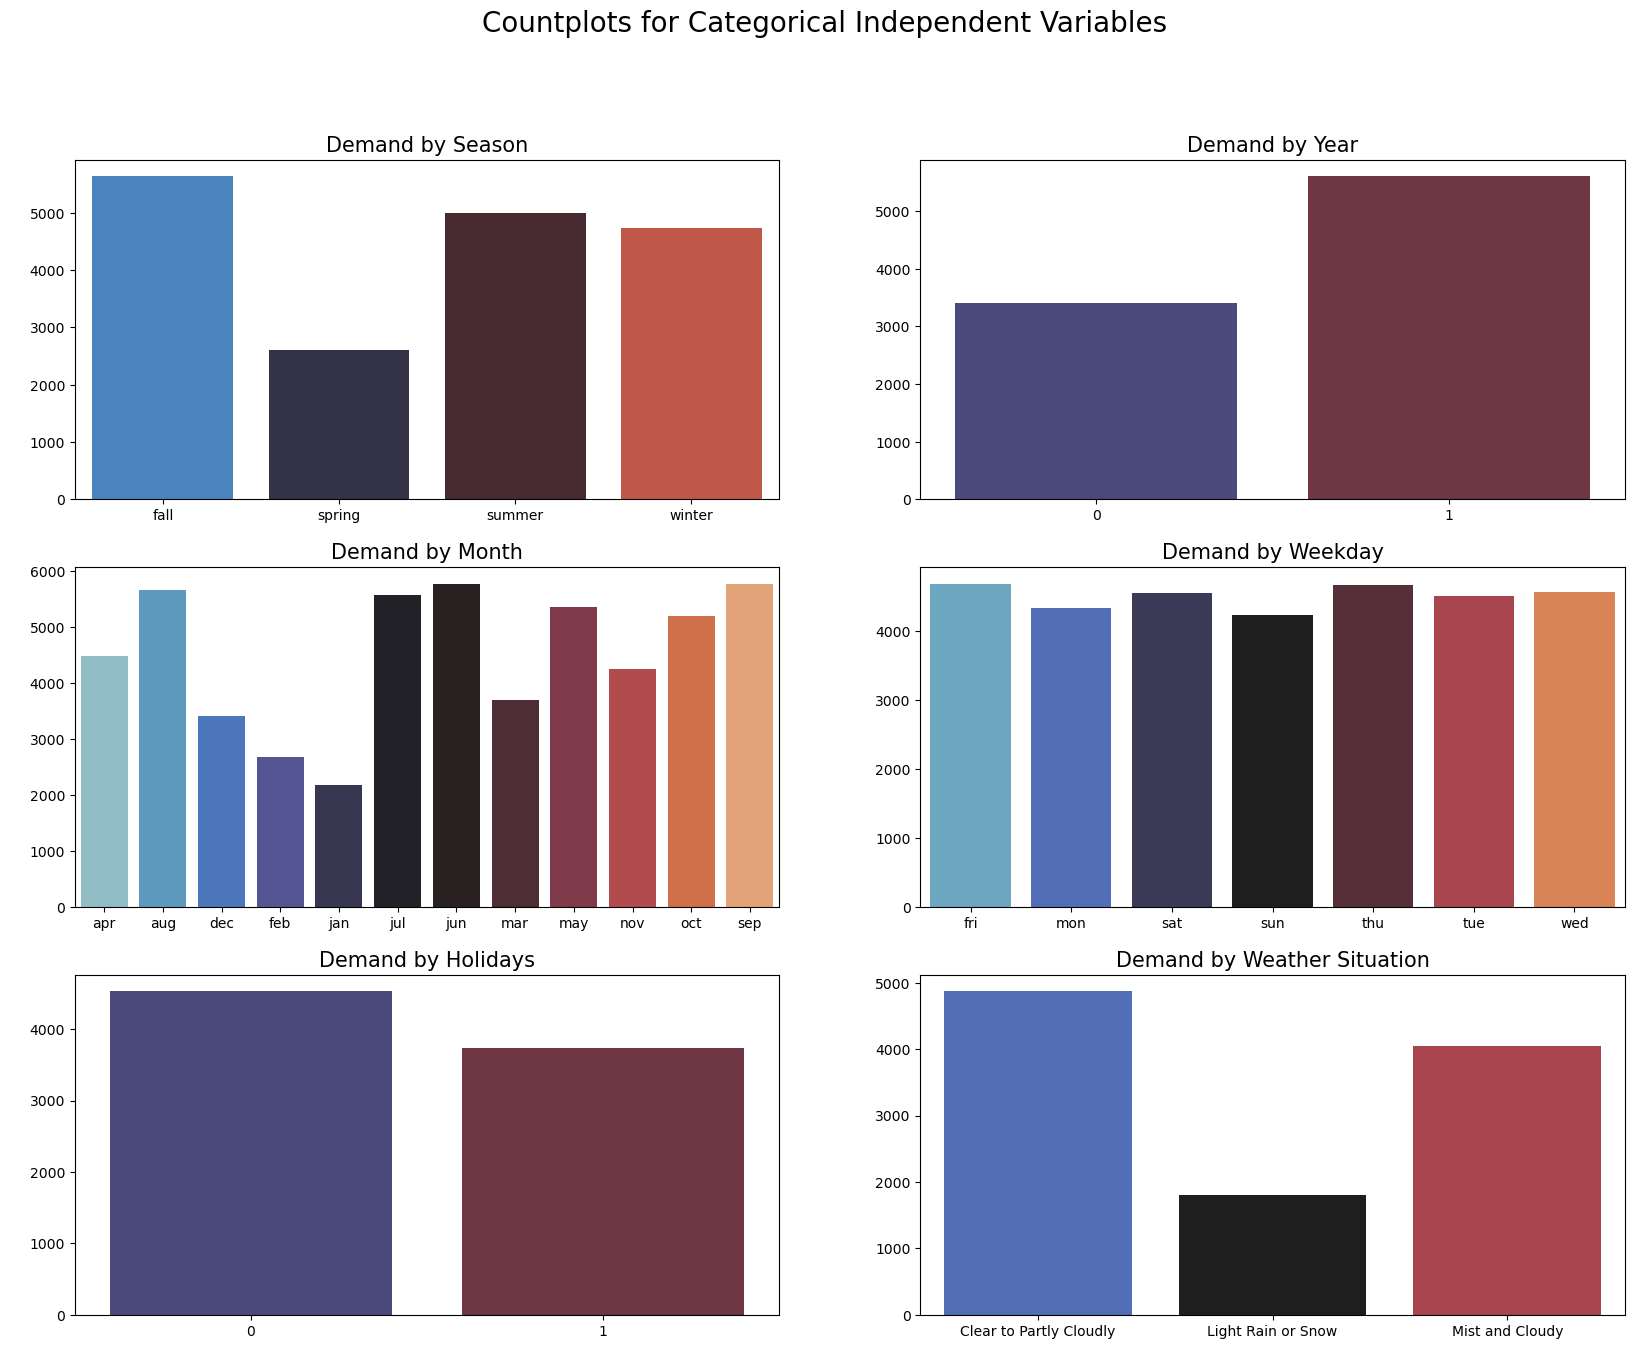

In [22]:
# subplot grid:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 15))

# Title
plt.suptitle('Countplots for Categorical Independent Variables', fontsize = 20, fontweight = 20)

#plot for Demand by Season
sns.barplot(y = bsd_2.groupby(by = 'season').mean()['cnt'], 
            x = bsd_2.groupby(by = 'season').mean().index,  ax = ax[0, 0], palette = 'icefire')        

ax[0, 0].set_title('Demand by Season', fontsize = 15)
ax[0, 0].set_ylabel(' ')
ax[0, 0].set_xlabel(' ')

#plot for Demand by Year
sns.barplot(y = bsd_2.groupby(by = 'yr').mean()['cnt'], 
            x = bsd_2.groupby(by = 'yr').mean().index,  ax = ax[0, 1], palette = 'icefire')        

ax[0, 1].set_title('Demand by Year', fontsize = 15)
ax[0, 1].set_ylabel(' ')
ax[0, 1].set_xlabel(' ')

#plot for Demand by Month
sns.barplot(y = bsd_2.groupby(by = 'mnth').mean()['cnt'], 
            x = bsd_2.groupby(by = 'mnth').mean().index,  ax = ax[1, 0], palette = 'icefire')        

ax[1, 0].set_title('Demand by Month', fontsize = 15)
ax[1, 0].set_ylabel(' ')
ax[1, 0].set_xlabel(' ')

#plot for Demand by Weekday
sns.barplot(y = bsd_2.groupby(by = 'weekday').mean()['cnt'], 
            x = bsd_2.groupby(by = 'weekday').mean().index,  ax = ax[1, 1], palette = 'icefire')        

ax[1, 1].set_title('Demand by Weekday', fontsize = 15)
ax[1, 1].set_ylabel(' ')
ax[1, 1].set_xlabel(' ')

#plot for Demand by Holidays
sns.barplot(y = bsd_2.groupby(by = 'holiday').mean()['cnt'], 
            x = bsd_2.groupby(by = 'holiday').mean().index,  ax = ax[2, 0], palette = 'icefire')        

ax[2, 0].set_title('Demand by Holidays', fontsize = 15)
ax[2, 0].set_ylabel(' ')
ax[2, 0].set_xlabel(' ')

#plot for Demand by Weathersit
sns.barplot(y = bsd_2.groupby(by = 'weathersit').mean()['cnt'], 
            x = bsd_2.groupby(by = 'weathersit').mean().index,  ax = ax[2, 1], palette = 'icefire')        

ax[2, 1].set_title('Demand by Weather Situation', fontsize = 15)
ax[2, 1].set_ylabel(' ')
ax[2, 1].set_xlabel(' ')

plt.show()

- We observe that the maximum demand is driven in the fall season and is followed by winter and summer. We see a steep decline in demand in the fall season.
- The business seems to have grown in 2019 since we see a significantly higher demand in 2019 vs 2018.
- We observe high demand in the months of May, Jun, Jul, Aug, Sep and Oct. These months of seem to have significant impact on the demand.
- Demand with respect to weekdays appears to be mixed with highest demand on Thu, Fri and Sat. Other days of the week are fairly consistent with little fluctuations.
- Demand seems to be lowers on holidays vs demand on weekdays.
- Demand for bikes are highest on Clear/Partly cloudy days.

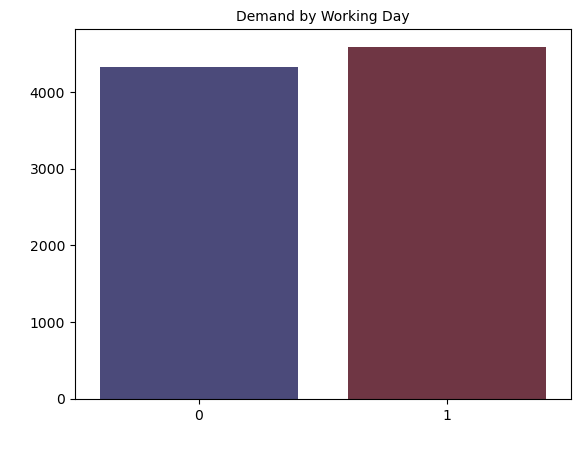

In [23]:
#Title
plt.title('Demand by Working Day', fontsize = 10)

#plot for Demand by Working Day
sns.barplot(y = bsd_2.groupby(by = 'workingday').mean()['cnt'], 
            x = bsd_2.groupby(by = 'workingday').mean().index, palette = 'icefire')        
plt.ylabel(' ')
plt.xlabel(' ')

plt.show()

- Demand for bikes are higher on working days than on holidays or weekends.

**Note:**
The Target Variable which is a count of both Causal and Registered Users. Based on this logic these variables can completely explain the variation in the Target variable as we have seen in the previous scatter plots and we would not be able to identify the true impact of the other contributing factors. Therefore, we will drop Casual and Registered Users.

In [24]:
# dropping registered and casual from the dataset

bsd_3 = bsd_2.drop(labels = ['casual', 'registered'], axis = 1)
bsd_3.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear to Partly Cloudly,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear to Partly Cloudly,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear to Partly Cloudly,9.305237,11.46350,43.6957,12.522300,1600


**Checking the Inter-variable Relationships with a heatmap** 

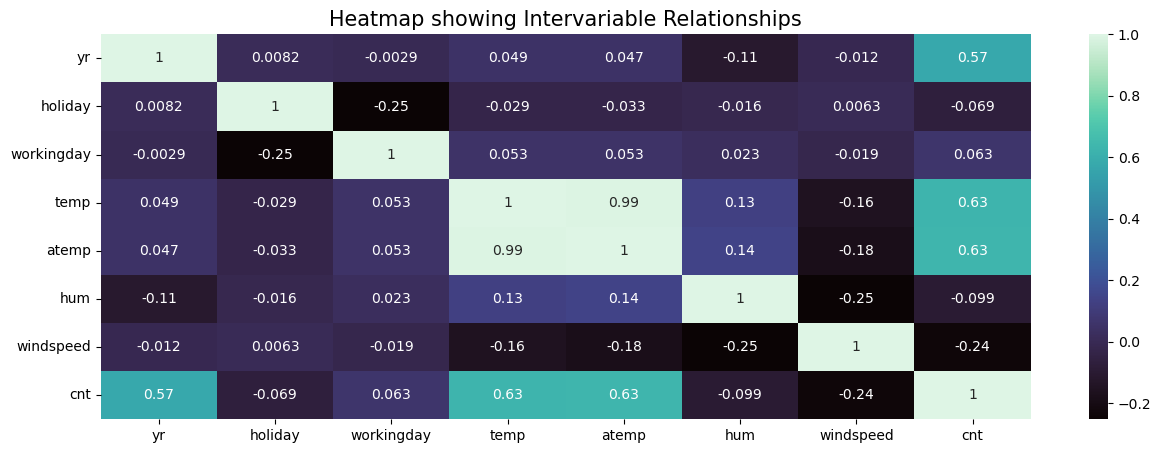

In [25]:
# setting figure size
plt.figure(figsize = (15, 5))

# Plotting heatmap
sns.heatmap(bsd_3.corr(), annot = True, cmap = 'mako')

#Title
plt.title('Heatmap showing Intervariable Relationships', fontsize = 15)

plt.show()

From the heatmap we observe:
- There is inverse relationship between the target variable and holiday, workingday, humidity and windspeend.
- There is a positive relationship between year, temperature and Atemp.

### Using Multiple Linear Regression for Model Development

In [26]:
# inspecting dataset

bsd_3.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear to Partly Cloudly,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear to Partly Cloudly,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear to Partly Cloudly,9.305237,11.46350,43.6957,12.522300,1600


- yr, holiday and workingday are binary variables
- dummies need to be created for season, weekday, weathersit

#### Creating Dummy Variables

Dummies for Season:
- 000 -> Fall
- 100 -> Spring
- 010 -> Summer
- 001 -> Winter

In [27]:
# Creating dummies for Seasons

season_dum = pd.get_dummies(data = bsd_3['season'], drop_first = True) 
season_dum.head(5)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Dummies for Month:
- 10000000000 -> Jan
- 01000000000 -> Feb
- 00100000000 -> Mar
- 00000000000 -> Apr
- 00010000000 -> May
- 00001000000 -> Jun
- 00000100000 -> Jul
- 00000010000 -> Aug
- 00000001000 -> Sep
- 00000000100 -> Oct
- 00000000010 -> Nov
- 00000000001 -> Dec

In [28]:
# Creating dummies for Month

month_dum = pd.get_dummies(data = bsd_3['mnth'], drop_first = True) 
month_dum.head(5)

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


Dummies for Weekday:
- 100000 -> Mon
- 010000 -> Tue
- 001000 -> Wed
- 000100 -> Thu
- 000000 -> Fri
- 000010 -> Sat
- 000001 -> Sun

In [29]:
# Creating dummies for Weekday

weekday_dum = pd.get_dummies(data = bsd_3['weekday'], drop_first = True) 
weekday_dum.head(5)

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


Dummies for Weather Situation:
- 00 -> Clear to Partly Cloudy
- 10 -> Mist and Cloudy
- 01 -> Light Rain or Snow

In [30]:
# Creating dummies for Weather Situation

weathersit_dum = pd.get_dummies(data = bsd_3['weathersit'], drop_first = True) 
weathersit_dum.head(5)

,Light Rain or Snow,Mist and Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [31]:
# Adding dummies to the dataset

bsd_4 = pd.concat([bsd_3, season_dum, month_dum, weekday_dum, weathersit_dum], axis = 1)
bsd_4.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain or Snow,Mist and Cloudy
0,spring,0,jan,0,sat,0,Mist and Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist and Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear to Partly Cloudly,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear to Partly Cloudly,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear to Partly Cloudly,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


- The dataset now has 34 columns after adding the dummies.
- We need to drop the main variables since we have already created dummies for them.

In [32]:
# Dropping the main variables for which dummies have been created

bsd_5 = bsd_4.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1)
bsd_5.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain or Snow,Mist and Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting the Data into Train-Test Sets

- We will be splitting the dataset into the Train Set and the Test Set. 
- We will use the train set to train the regression model so that it can learn the coefficients.
- We will use the coefficients leanred from the train set and apply them into the test set and see how well the model explains the variation.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Splitting the data into train and set set
np.random.seed(0)
bsd_train, bsd_test = train_test_split(bsd_5, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
#Checking the shape of the train and test sets

print(f'The Train Set contains {bsd_train.shape[0]} rows and {bsd_train.shape[1]} columns')
print(f'The Test Set contains {bsd_test.shape[0]} rows and {bsd_test.shape[1]} columns')

The Train Set contains 510 rows and 30 columns
The Test Set contains 219 rows and 30 columns


#### Recaling the Data

We are going to rescale the data for a more accurate prediction. <br>
We will be using the MinMaxScaler to normalise the data. This will take care of the outliers as well.

In [36]:
# Importing MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

# Creating a Scaler instance
scaler = MinMaxScaler()

In [37]:
# Creating a list of variables that require scaling

sca_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Applying Scaler() to required columns

bsd_train[sca_var] = scaler.fit_transform(bsd_train[sca_var])

In [38]:
bsd_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain or Snow,Mist and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


**Dividing the dataset into X and Y sets for Model Building**

In [39]:
# splitting into X and Y sets

y_train = bsd_train.pop('cnt')
x_train = bsd_train

In [40]:
#Checking the shape of the X and Y train sets

print(f'The x_train Set contains {x_train.shape[0]} rows and {x_train.shape[1]} columns')
print(f'y_train Set shape: {y_train.shape}')

The x_train Set contains 510 rows and 29 columns
y_train Set shape: (510,)


### Model Development

We will be using RFE (Recursive Feature Elimination) for automated selection. Recursive Feature Elimination is a feature selection method to identify a dataset's key features.

#### Recursive Feature Elimination

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Creating an instance of Linear Regression
lm = LinearRegression()

# Fitting model with X train and Y train:
lm.fit(x_train, y_train)

# Creating RFE instance on fitted in:
rfe = RFE(estimator = LinearRegression(), n_features_to_select = 20)

# Converting RFE to fitted RFE
rfe = rfe.fit(x_train, y_train)

In [43]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', True, 1),
 ('mar', False, 4),
 ('may', False, 10),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 2),
 ('thu', False, 7),
 ('tue', False, 3),
 ('wed', False, 5),
 ('Light Rain or Snow', True, 1),
 ('Mist and Cloudy', True, 1)]

- The output from RFE gives us the top 20 variables we should retain.

In [44]:
# Retaining the 20 columns suggested by RFE
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'jun', 'nov',
       'sep', 'sat', 'Light Rain or Snow', 'Mist and Cloudy'],
      dtype='object')

In [45]:
# Retaining RFE suggested columns in X-train Dataset

x_train_rfe = x_train[col]
x_train_rfe.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,dec,feb,jan,jul,jun,nov,sep,sat,Light Rain or Snow,Mist and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,0,1


In [46]:
#Checking the shape of the X-Rrain_RFE

print(f'The x_train_rfe Set contains {x_train_rfe.shape[0]} rows and {x_train_rfe.shape[1]} columns')


The x_train_rfe Set contains 510 rows and 20 columns


#### Using statsmodel for building model for detailed statistics

In [47]:
# importing statsmodel

import statsmodels.api as sm

In [48]:
# adding a constant

x_train_rfe = sm.add_constant(x_train_rfe)

In [49]:
x_train_rfe.shape

(510, 21)

In [50]:
# Running the linear model

lm = sm.OLS(y_train, x_train_rfe).fit()

In [51]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          3.29e-188
Time:                        20:29:33   Log-Likelihood:                 525.70
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -920.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2848      0

From the above summary statistics we observe that:
- The R-Square is 0.852 (85.2%), which implies that 85% of the variation in the demand is being explained by the 20 independent variables.
- The Adjusted R-Square is 0.846 (84.6%)
- Considering a threshold of 0.05 for P-Values, the variables which are crossing this threshold are:
    - holiday
    - atemp
    - spring
    - summer
    - feb
    - may
    - nov
- P-Values of all other variables are within acceptable range.

Next we will be looking into the VIF of the variables. Variance Inflation Factor (VIF) is the measure of multicolinearity in a regression analysis.

- A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
- Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables.
- A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [52]:
x_train_new = x_train_rfe.drop('const', axis =1)

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,386.48
4,atemp,369.31
5,hum,33.45
7,spring,5.73
2,workingday,5.40
6,windspeed,5.08
9,winter,4.28
8,summer,3.10
12,jan,2.45
19,Mist and Cloudy,2.33


Considering the acceptable threshold for VIF to be 5, from VIF table we can see:
- temp, atemp and hum has the highest VIF.
- spring, workingday, windspeed have a VIF which is slightly above 5.

We will drop 'atemp' since it has a very high VIF and P-Value and rerun the model.

In [54]:
# Dropping atemp

x_train_rfe_1 = x_train_rfe.drop('atemp', axis =1)

In [55]:
# Running the linear model

lm = sm.OLS(y_train, x_train_rfe_1).fit()

In [56]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.67e-189
Time:                        20:29:47   Log-Likelihood:                 525.70
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2847      0

From the above summary statistics we observe that:
- The Adjusted R-Square improved to 0.847 (84.7%)
- Considering a threshold of 0.05 for P-Values, the variables which are crossing this threshold are:
    - holiday
    - summer
    - feb
    - may
- P-Values of all other variables are within acceptable range.

In [57]:
x_train_new = x_train_rfe_1.drop('const', axis =1)

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,33.43
3,temp,23.29
6,spring,5.62
2,workingday,5.40
5,windspeed,4.83
8,winter,4.12
7,summer,2.96
11,jan,2.44
18,Mist and Cloudy,2.33
0,yr,2.11


From the above table we can see that:
- hum and temp have the highest VIF.

We will drop hum from the dataset and rerun the model

In [59]:
# Dropping hum

x_train_rfe_2 = x_train_rfe_1.drop('hum', axis =1)

In [60]:
# Running the linear model

lm = sm.OLS(y_train, x_train_rfe_2).fit()

In [61]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          5.82e-187
Time:                        20:30:02   Log-Likelihood:                 517.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     491   BIC:                            -916.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2167      0

From the above summary statistics we observe that:
- The R-Squared has declined to 0.847 (84.7%)
- The Adjusted R-Square improved to 0.842 (84.2%)
- Considering a threshold of 0.05 for P-Values, the variables which are crossing this threshold are:
    - holiday
    - summer
    - feb
    - may
- P-Values of all other variables are within acceptable range.

In [62]:
x_train_new = x_train_rfe_2.drop('const', axis =1)

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,8.40
2,workingday,5.38
4,windspeed,4.74
5,spring,4.58
7,winter,3.12
6,summer,2.34
10,jan,2.25
0,yr,2.08
15,sat,2.00
9,feb,1.89


- Although we see that temp still has a VIF above 5. It is still a significant variable and dropping temp reduces the R-Squred significantly.

We will drop Jun

In [64]:
# Dropping jun

x_train_rfe_3 = x_train_rfe_2.drop('jun', axis =1)

In [65]:
# Running the linear model

lm = sm.OLS(y_train, x_train_rfe_3).fit()

In [67]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          4.80e-188
Time:                        20:31:19   Log-Likelihood:                 517.36
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     492   BIC:                            -922.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2187      0

- Considering a threshold of 0.05 for P-Values, the variables which are crossing this threshold are:
    - holiday
    - feb
- P-Values of all other variables are within acceptable range.

In [68]:
x_train_new = x_train_rfe_3.drop('const', axis =1)

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.30
2,workingday,5.35
4,windspeed,4.73
5,spring,4.55
7,winter,3.07
6,summer,2.33
10,jan,2.24
0,yr,2.08
14,sat,1.99
9,feb,1.89


- Even though we see a low VIF for feb, the P-Value is quite high. Therefore we will drop this in the next iteration.

In [70]:
# Dropping feb

x_train_rfe_4 = x_train_rfe_3.drop('feb', axis =1)

In [71]:
# Running the linear model

lm = sm.OLS(y_train, x_train_rfe_4).fit()

In [72]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.49e-188
Time:                        20:32:18   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2055      0

In [73]:
x_train_new = x_train_rfe_4.drop('const', axis =1)

In [74]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.21
2,workingday,5.33
4,windspeed,4.72
5,spring,3.17
7,winter,3.03
6,summer,2.33
0,yr,2.08
13,sat,1.99
11,nov,1.81
9,jan,1.68


- Dropping holiday since it has a high P-Value

In [75]:
# Dropping holiday

x_train_rfe_5 = x_train_rfe_4.drop('holiday', axis =1)

In [76]:
# Running the linear model

lm = sm.OLS(y_train, x_train_rfe_5).fit()

In [77]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          5.71e-189
Time:                        20:32:59   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1999      0

From the above summary we see that:
- R-Squared is 0.845 (84.5%)
- Adjusted R-Squared is 0.845 (84.5%)
- All the P-Values are within the threshold of 0.05

In [78]:
x_train_new = x_train_rfe_5.drop('const', axis =1)

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
4,spring,3.09
6,winter,3.02
5,summer,2.32
0,yr,2.08
12,sat,1.86
10,nov,1.78
8,jan,1.67


From the VIF table we observe that all VIF values are under the threshold of 5. Except for Temperature but since this is an important variable we have decided to keep it into the model.

#### Residual Analysis

We will be checking if residuals are normally distributed or not.

In [80]:
# Calculating residuals

lm = sm.OLS(y_train, x_train_rfe_5).fit()
y_train_pred = lm.predict(x_train_rfe_5)
residuals = y_train - y_train_pred

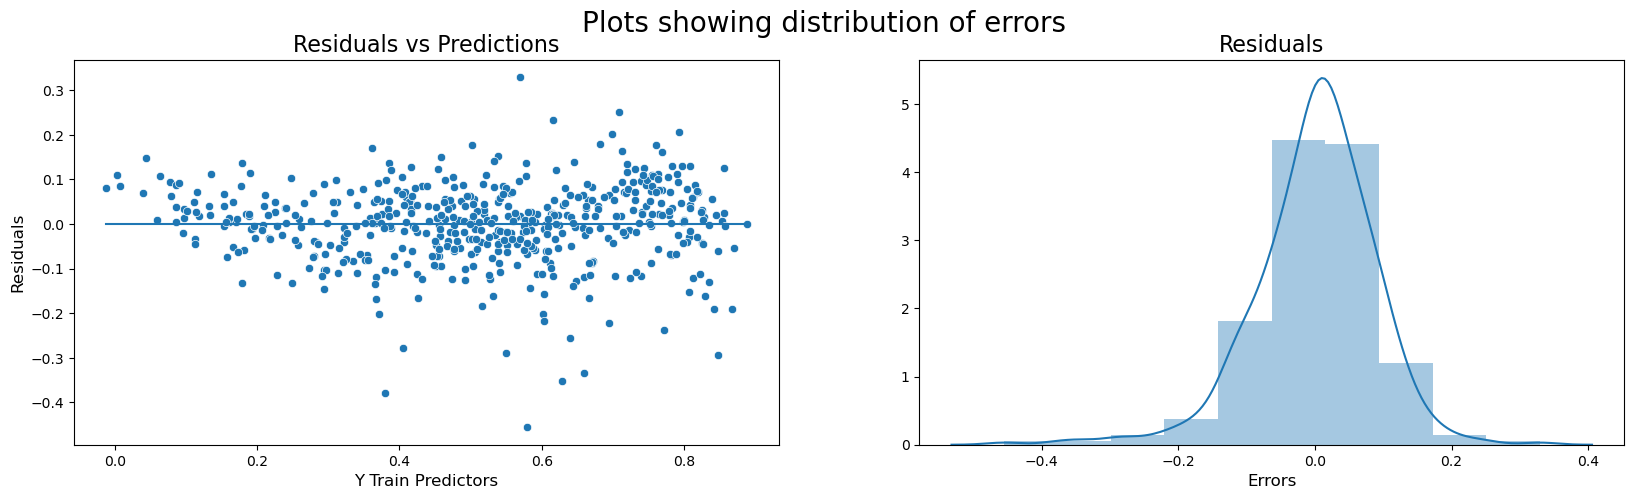

In [81]:
# subplot grid:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Title
plt.suptitle('Plots showing distribution of errors', fontsize = 20, fontweight = 20)

# Scatter plot for residuals
sns.scatterplot(y = residuals.values, x = y_train_pred, ax = ax[0])
sns.lineplot(y = residuals.mean(), x = y_train_pred, ax = ax[0])

ax[0].set_title('Residuals vs Predictions', fontsize = 16)
ax[0].set_ylabel('Residuals', fontsize = 12)
ax[0].set_xlabel('Y Train Predictors', fontsize = 12)

# Distribution of Residuals
sns.distplot(residuals, bins = 10, ax = ax[1])

ax[1].set_title('Residuals', fontsize = 16)
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Errors', fontsize = 12)

plt.show()

In [82]:
residuals.describe()

count    5.100000e+02
mean     1.149407e-16
std      8.837874e-02
min     -4.557821e-01
25%     -4.556838e-02
50%      6.874620e-03
75%      5.348307e-02
max      3.294171e-01
dtype: float64

From the plots we observe that:
- The mean of residuals is close to 0.
- The distribution of residuals does not follow any specific pattern.
- The residuals seems to be normally distributed.

### Making Predictions

**Applying Scaling on Test Demand:** <br>
We have already applied scaler on the training set. We will be using the same scaler to rescale our test data variables.

In [83]:
#Checking data

bsd_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain or Snow,Mist and Cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [84]:
# Scaling the variables in the test set

bsd_test[sca_var] = scaler.fit_transform(bsd_test[sca_var])
bsd_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain or Snow,Mist and Cloudy
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


#### Dividing the test set into X and Y sets

In [85]:
# splitting into X and Y sets

y_test = bsd_test.pop('cnt')
x_test = bsd_test

In [86]:
#Checking the shape of the X and Y train sets

print(f'The x_test Set contains {x_test.shape[0]} rows and {x_test.shape[1]} columns')
print(f'y_test Set shape: {y_test.shape}')


The x_test Set contains 219 rows and 29 columns
y_test Set shape: (219,)


**Note:** Now that we have created the X and Y sets we will drop the required variables from X test.

In [87]:
# adding a constant

x_test = sm.add_constant(x_test)

In [88]:
# Creating a new set for X-test by dropping the required variables

x_test_1 = x_test[x_train_rfe_5.columns]
x_test_1.head()

,const,yr,workingday,temp,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,sat,Light Rain or Snow,Mist and Cloudy
184,1.0,0,0,0.837241,0.149393,0,0,0,0,0,1,0,0,0,0,1
535,1.0,1,1,0.911423,0.231142,0,1,0,0,0,0,0,0,0,0,0
299,1.0,0,1,0.496221,0.443398,0,0,1,0,0,0,0,0,0,0,1
221,1.0,0,1,0.890387,0.449707,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.821739,0.682387,0,1,0,0,0,0,0,0,0,0,0


In [89]:
# Making Predictions

y_test_pred = lm.predict(x_test_1)

### Evaluating the predictions

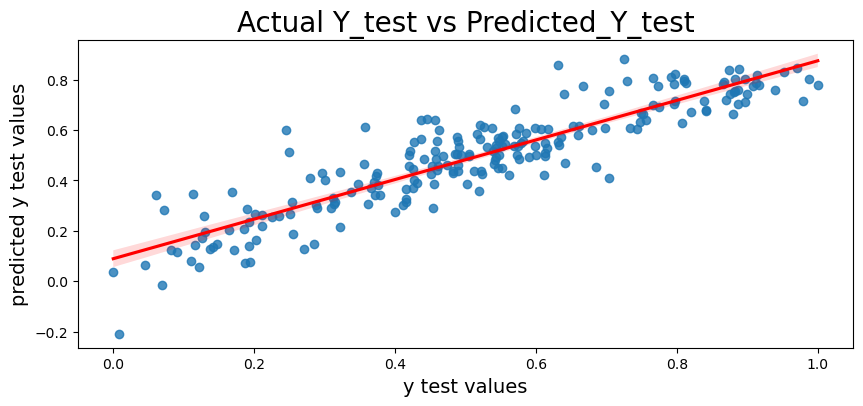

In [90]:
# Plotting Y_test and Y_test_pred to understand the spread
fig = plt.figure(figsize = (10, 4))

# Plotting figure
sns.regplot(x = y_test, y = y_test_pred, line_kws = {'color': 'red'})

plt.title('Actual Y_test vs Predicted_Y_test', fontsize = 20)
plt.xlabel('y test values', fontsize = 14)
plt.ylabel('predicted y test values', fontsize = 14)

plt.show()

From the plot we can observe that the Y-test and Y-test predicted values look to have a strong healthy fit visually.

### Assessing Model Quality and Generalization Ability 

In [96]:
from sklearn.metrics import r2_score

print('R2 Score of test data predictions:', round(r2_score(y_pred = y_test_pred, y_true = y_test), 3))
print('R2 Score of train data predictions:', round(r2_score(y_pred = y_train_pred, y_true = y_train), 3))
print('Absolute difference betweem R2 scores of test and train dataset predictions:',
     abs(round(r2_score(y_pred = y_test_pred, y_true = y_test), 3) - round(r2_score(y_pred = y_train_pred, y_true = y_train), 3)))

R2 Score of test data predictions: 0.805
R2 Score of train data predictions: 0.845
Absolute difference betweem R2 scores of test and train dataset predictions: 0.039999999999999925


The difference between train data prediction and test data prediction R-Square is less than 5%. Therefore we can say that the model is good to generalised.

### Equation for Prediction

In [98]:
# Getting the set of parameters

parameters = pd.Series(lm.params)
parameters

const                 0.199908
yr                    0.234634
workingday            0.054822
temp                  0.434402
windspeed            -0.161009
spring               -0.071666
summer                0.033837
winter                0.091913
dec                  -0.048332
jan                  -0.052837
jul                  -0.046875
nov                  -0.046884
sep                   0.064758
sat                   0.067132
Light Rain or Snow   -0.297995
Mist and Cloudy      -0.083067
dtype: float64

***Demand Equation is:***

**Demand =** 0.2+(0.235 x **yr**) + (0.055 x **workingday**) + (0.434 x **temp**) - (0.161 x **windspeed**) - (0.072 x **spring**) + (0.034 x **summer**) + (0.092 x **winter**) - (0.048 x **dec**) - (0.053 x **jan**) - (0.047 x **jul**) - (0.047 x **nov**) + (0.065 x **sep**) + (0.067 x **sat**) - (0.298 x **Light Rain or Snow**) - (0.083 x **Mist and Cloudy**)



### Business Insights and Recommendations

- Temperature is an important factor affecting demand. With a unit change in temperature the demand will increase by 43%. Therefore the recommendation would be to build up to required capacity during hotter months of the year.
- Light Rain or Snow impacts the demand greatly, i.e., if there a unit change in Rainfall/Snowfall the demand falls by 30%.
- Another important factor is Year. Given other factors remain unchanged the company is expected to see a growth of 23%.
- Windspeed acts as an important factor. A unit change in the windspeed causes the demand to fall by 16%.